# Canonicalize CHEMBL molecules
We're doing this once so we can save on compute later.
Guacamol optimizers often canonicalize these sets.

In [ ]:
from guacamol.utils.chemistry import canonicalize
import os
from multiprocessing import Pool
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
files = [f for f in glob('data/*') if not f.endswith('.can')]

for file in files:
    can_file = file+'.can'
    if os.path.isfile(can_file):
        continue
        
    with open(file) as f:
        smiles = f.read().split()
    with Pool(16) as pool:
        can_smiles = pool.map(canonicalize, smiles)    
    
    print(len(smiles), len(can_smiles))
    with open(can_file, 'w') as f:
        f.write('\n'.join(smiles))

1591378 1591378
79568 79568
1273104 1273104
238706 238706


# Preprocessing of JAK2

In [ ]:
chid = 'CHEMBL3888429'
df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
df = df[['Smiles', 'pChEMBL Value']]
df.columns = ['smiles', 'value']

label = np.array([1 if x>8 else 0 for x in df.value])
print(label.mean())
df['label'] = label
df.to_csv(f'./assays/processed/{chid}.csv', index=None)

# EGFR

In [ ]:
chid = 'CHEMBL1909203'
df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
df.head()

# df[]
df['label'] = pd.isna(df['Comment']).astype('int')
df['smiles'] = df['Smiles']
df = df[['smiles', 'label']]
print(df.label.sum())
df = df.dropna()
print(df.label.sum())
df.to_csv(f'./assays/processed/{chid}.csv', index=None)

47
40


# DRD2

In [ ]:
chid = 'CHEMBL1909140'
df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
df.head()

# df[]
df['label'] = pd.isna(df['Comment']).astype('int')
df['smiles'] = df['Smiles']
df = df[['smiles', 'label']]
print(df.label.sum())
df = df.dropna()
print(df.label.sum())
df.to_csv(f'./assays/processed/{chid}.csv', index=None)

59
59


In [ ]:
# Too little actives
chid = 'CHEMBL1613933'

df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
df.head()
df[[c for c in df.columns if c.startswith('Standard')]]
(df.Comment == 'Active').sum()

3

In [ ]:
# df[]
df['label'] = pd.isna(df['Comment']).astype('int')
df['smiles'] = df['Smiles']
df = df[['smiles', 'label']]
print(df.label.sum())
df = df.dropna()
print(df.label.sum())
df.to_csv(f'./assays/processed/{chid}.csv', index=None)

# Plasmodium Falciparum

0.3028153402793172

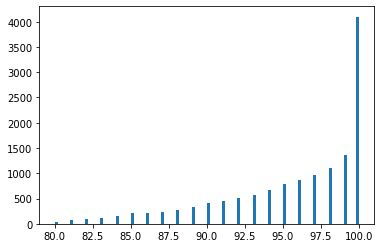

In [ ]:
chid = 'CHEMBL1054500'

df = pd.read_csv(f'./assays/raw/{chid}.csv', sep=';')
value = df['Standard Value']
plt.hist(value, bins=100);
(value > 99).mean()